# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python

Alunos: Matheus Henrique Lourenço de Oliveira (19205617) e Mayara Dargas Sousa (20203642)

# Abrir planilha de fatores de emissões compilada.

Utilizei o capítulo 11.7 da AP42, pois meu empreendimento é uma Indústria de Revestimentos Cerâmicos
https://www.epa.gov/sites/default/files/2020-10/documents/c11s07.pdf

In [3]:
# Utilizando Pandas para abrir a planilha
import pandas as pd
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

# Indicando nome do arquivo
chapterNumer = 11
subChapter = 7
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file)
print(fe)

C:\Users\mathe\Documents\GitHub\-ENS410064\tabelas\FE
chp_11_7.csv
                                     Source    PM  Lead       SO2   NOX    CO  \
0                       CRM - Fabric filter  0.06   NaN       NaN   NaN   NaN   
1                                     Dryer  1.15   NaN       NaN   NaN   NaN   
2                                    Cooler  0.06   NaN       NaN   NaN   NaN   
3                      GNSD - Fabric filter  0.03   NaN       NaN   NaN   NaN   
4                   GNSD - Venturi scrubber  0.10   NaN       NaN   NaN   NaN   
5             Firing natural gas fired kiln  0.25   NaN  0.044476  0.27  1.65   
6          Refiring  natural gas fired kiln  0.03   NaN       NaN   NaN   NaN   
7                  CGS - booth uncontrolled  9.50   1.5       NaN   NaN   NaN   
8  CGS-booth uncontrolled with wet scrubber  0.90   NaN       NaN   NaN   NaN   

     COV    CO2    HF  Fluorides  Unnamed: 10  Unnamed: 11  
0    NaN    NaN   NaN        NaN          NaN          NaN  


## Explicar as premissas adotadas ou valores fornecidos

206.08479999999997
1
2
3
4
5
6
7
8
9
10
11


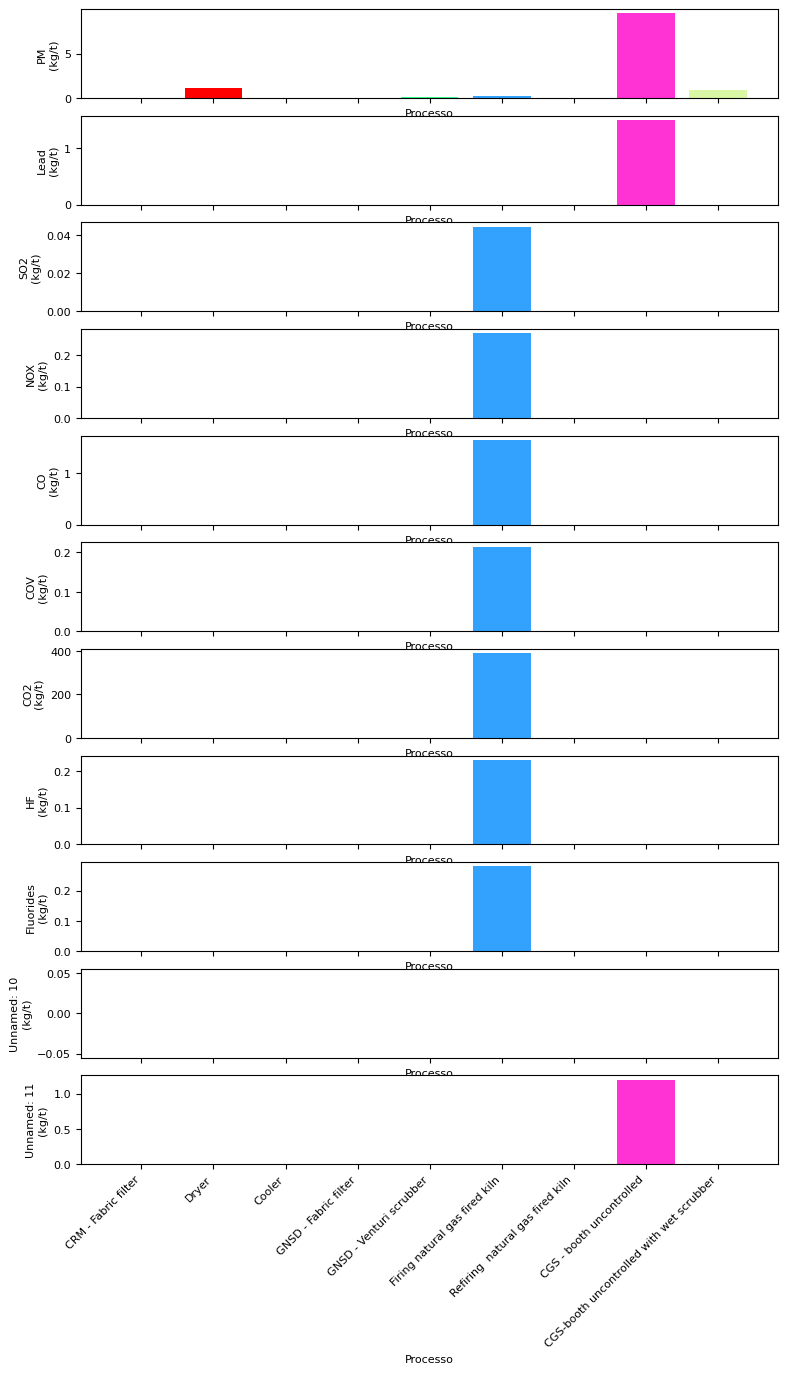

In [4]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 17.06 # Considerando uma taxa de atividade em toneladas: foi assumida a premissa de que todas as unidades produziam a mesma qunatodade de m² de porcelanato e que cada porcelato pesa aproximadamente  2kg
emis = fe['PM']*atv

#Somando dataframe
print(emis.sum())

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True,figsize=(9, 15))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Source'],fe.iloc[:,ii],color = ['#DAF7A6','red','cyan','#F6FF33','#33FF8D','#33A2FF','#7733FF','#FF33D4'])
    ax[ii-1].set_xlabel('Processo', fontsize=8)  # Define o tamanho da fonte para o eixo x
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/t)', fontsize=8)  # Define o tamanho da fonte para o eixo y

    # Define o tamanho da fonte para os rótulos dos ticks nos eixos x e y
    ax[ii-1].tick_params(axis='x', labelsize=8)
    ax[ii-1].tick_params(axis='y', labelsize=8)

    # Define os rótulos dos ticks nos eixos x
    ax[ii-1].set_xticks(fe['Source'].index)  # Define a localização dos ticks no eixo x
    ax[ii-1].set_xticklabels(fe['Source'], rotation=45, ha='right', fontsize=8)  # Define os rótulos dos ticks no eixo x

# Salva a figura na pasta figures - criar a pasta antes!!
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

## Qual é o processo do empreendimento que possui maior emissão? analise os fatores de emissão através de figuras, comparando os processos
## - Não tem como responder precisamente pq nem todos o equipamento apresentam os fatores de emissão bem definidos mas avaliando apenas pelo parâmetro PM seria o Ceramic glaze spray booth uncontrolled
## Qual a variabilidade temporal da taxa de atividade? estime esta taxa e demonstre a componente sazonal (variabilidade entre meses) e aleatória. Faça figuras e discuta.
## Qual a soma das emissões considerando todos os processos? qual a emissão média, mínima e máxima (unidades sempre em gramas por segundo - g/s)

# Criando taxa de atividade aleatória com sazonalidade

Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

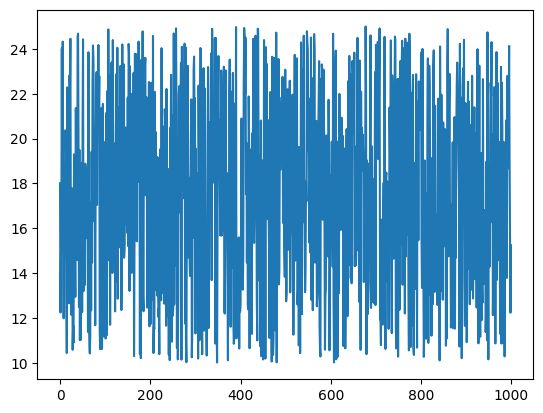

In [5]:
# Criando vetor de valores aleatórios
import numpy as np
atvMax = 25 # o é o valor de máximo e mínimo 
atvMin = 10
n = 1000 # o queé n 
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
#print(atv)

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(atv)

In [13]:
# Criar um vetor com as datas
from datetime import datetime, timedelta

# Definindo a data inicial e final
data_inicial = datetime(2023, 1, 1)
data_final = datetime(2023, 12, 31)

# Definindo o passo (intervalo entre as datas)
passo = timedelta(days=1)

# Criando o vetor de datas
vetor_datas = []
data_atual = data_inicial
while data_atual <= data_final:
    vetor_datas.append(data_atual)
    data_atual += passo

# Exibindo o vetor de datas
for data in vetor_datas:
    print(data)

2023-01-01 00:00:00
2023-01-02 00:00:00
2023-01-03 00:00:00
2023-01-04 00:00:00
2023-01-05 00:00:00
2023-01-06 00:00:00
2023-01-07 00:00:00
2023-01-08 00:00:00
2023-01-09 00:00:00
2023-01-10 00:00:00
2023-01-11 00:00:00
2023-01-12 00:00:00
2023-01-13 00:00:00
2023-01-14 00:00:00
2023-01-15 00:00:00
2023-01-16 00:00:00
2023-01-17 00:00:00
2023-01-18 00:00:00
2023-01-19 00:00:00
2023-01-20 00:00:00
2023-01-21 00:00:00
2023-01-22 00:00:00
2023-01-23 00:00:00
2023-01-24 00:00:00
2023-01-25 00:00:00
2023-01-26 00:00:00
2023-01-27 00:00:00
2023-01-28 00:00:00
2023-01-29 00:00:00
2023-01-30 00:00:00
2023-01-31 00:00:00
2023-02-01 00:00:00
2023-02-02 00:00:00
2023-02-03 00:00:00
2023-02-04 00:00:00
2023-02-05 00:00:00
2023-02-06 00:00:00
2023-02-07 00:00:00
2023-02-08 00:00:00
2023-02-09 00:00:00
2023-02-10 00:00:00
2023-02-11 00:00:00
2023-02-12 00:00:00
2023-02-13 00:00:00
2023-02-14 00:00:00
2023-02-15 00:00:00
2023-02-16 00:00:00
2023-02-17 00:00:00
2023-02-18 00:00:00
2023-02-19 00:00:00


In [7]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Mostrar o DataFrame resultante
print(df)

          Data  Mes
0   2024-01-01    1
1   2024-01-02    1
2   2024-01-03    1
3   2024-01-04    1
4   2024-01-05    1
..         ...  ...
361 2024-12-27   12
362 2024-12-28   12
363 2024-12-29   12
364 2024-12-30   12
365 2024-12-31   12

[366 rows x 2 columns]


In [8]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r"C:\Users\mathe\Documents\GitHub\-ENS410064\tabelas\ativ.csv")


# Criando uma figura com os valores aleatórios
#fig, ax= plt.subplots()
#ax.plot(datas, atv)

          Data  Mes  atividade
0   2024-01-01    1  13.808475
1   2024-01-02    1  10.997707
2   2024-01-03    1  18.021176
3   2024-01-04    1  24.458951
4   2024-01-05    1  20.973366
..         ...  ...        ...
361 2024-12-27   12  23.790777
362 2024-12-28   12  22.392219
363 2024-12-29   12  13.083204
364 2024-12-30   12  12.753155
365 2024-12-31   12  13.714292

[366 rows x 3 columns]


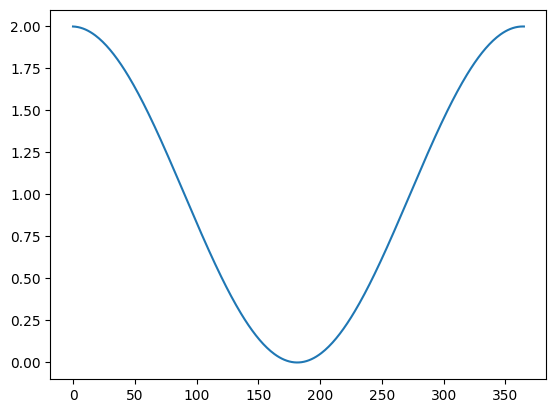

In [30]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Dia do Ano']/365)+1

df['sazonalidade'] = sazonalidade 
plt.plot(sazonalidade)
df.to_csv(r"C:\Users\mathe\Documents\GitHub\-ENS410064\tabelas\ativ.csv")

# o ideal seria o eixo x estar separado por mês, eixo y é a produção

12918.32379635669


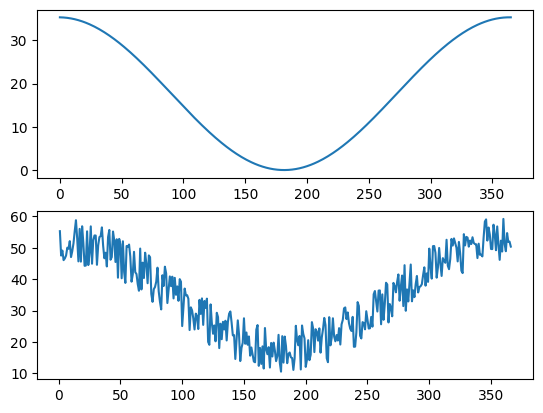

In [28]:
# Valores aleatórios com sazonalidade

#df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade'] 

df['aleatorio'] =  (atvMax - atvMin)*np.random.rand(n) + atvMin

df['aleatorioSazonal'] = (df['atividade'] +  df['sazonalidade']*df['atividade'].mean())

fig,ax= plt.subplots(2)

ax[1].plot(df['Dia do Ano'], df['aleatorioSazonal'])
ax[0].plot(df['sazonalidade']*df['atividade'].mean())
print(df['aleatorioSazonal'].mean()*365)

